


**Importing the labraries needed**


In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [94]:
#leading data
costumer_data = pd.read_csv("costumer_chrun.csv")

In [96]:
#display the first five rows
costumer_data.head()

customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95       1889.5     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes

[5 rows x 21 columns]

In [99]:
#delte the costumerID column there is no need for using it
costumer_data.drop('customerID',axis='columns',inplace=True)


KeyError: ignored

In [98]:
#check types of data set in columns
costumer_data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

 
**Let's check what's going on with this column**


In [14]:
costumer_data.TotalCharges.values


array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

**All columns are object let switch to numeric**

In [16]:
pd.to_numeric(costumer_data.TotalCharges)


ValueError: ignored

**Some values seems to be blanked string  we cant convert them**

In [101]:
#so we have 11 null rows
pd.to_numeric(costumer_data.TotalCharges,errors='coerce').isnull().sum()


11

In [102]:
#let's display them
costumer_data[pd.to_numeric(costumer_data.TotalCharges,errors='coerce').isnull()]


gender  SeniorCitizen Partner  ... MonthlyCharges  TotalCharges Churn
488   Female              0     Yes  ...          52.55                  No
753     Male              0      No  ...          20.25                  No
936   Female              0     Yes  ...          80.85                  No
1082    Male              0     Yes  ...          25.75                  No
1340  Female              0     Yes  ...          56.05                  No
3331    Male              0     Yes  ...          19.85                  No
3826    Male              0     Yes  ...          25.35                  No
4380  Female              0     Yes  ...          20.00                  No
5218    Male              0     Yes  ...          19.70                  No
6670  Female              0     Yes  ...          73.35                  No
6754    Male              0      No  ...          61.90                  No

[11 rows x 20 columns]

In [19]:
costumer_data.iloc[:]['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

**In total we have 7043 compare to those 11 columns , so let's delete them**

In [103]:
new_costumer_data = costumer_data[costumer_data.TotalCharges!=' ']

In [104]:
new_costumer_data.shape

(7032, 20)

In [22]:
new_costumer_data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [24]:
new_costumer_data.TotalCharges = pd.to_numeric(new_costumer_data.TotalCharges)
new_costumer_data.TotalCharges.dtype

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


dtype('float64')

In [23]:
new_costumer_data.TotalCharges.values


array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [27]:
new_costumer_data[new_costumer_data.Churn=='No']


gender  SeniorCitizen Partner  ... MonthlyCharges  TotalCharges Churn
0     Female              0     Yes  ...          29.85         29.85    No
1       Male              0      No  ...          56.95       1889.50    No
3       Male              0      No  ...          42.30       1840.75    No
6       Male              0      No  ...          89.10       1949.40    No
7     Female              0      No  ...          29.75        301.90    No
...      ...            ...     ...  ...            ...           ...   ...
7037  Female              0      No  ...          21.15       1419.40    No
7038    Male              0     Yes  ...          84.80       1990.50    No
7039  Female              0     Yes  ...         103.20       7362.90    No
7040  Female              0     Yes  ...          29.60        346.45    No
7042    Male              0      No  ...         105.65       6844.50    No

[5163 rows x 20 columns]

**Data Visualization**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


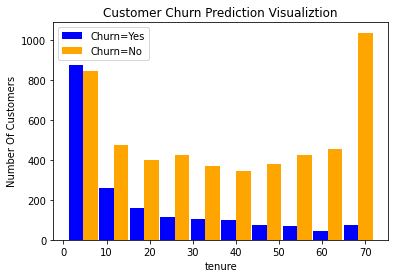

In [26]:
churn_no = new_costumer_data[new_costumer_data.Churn=='No'].tenure
churn_yes = new_costumer_data[new_costumer_data.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([churn_yes, churn_no], rwidth=0.95, color=['blue','orange'],label=['Churn=Yes','Churn=No'])
plt.legend()

**there are  yes, no columns . Let's print unique values in object columns to see data values**

In [30]:
def find_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [31]:
find_unique_col_values(new_costumer_data)


gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Normalazation**

In [32]:
new_costumer_data.replace('No internet service','No',inplace=True)
new_costumer_data.replace('No phone service','No',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


**Convert Yes and No to 1 or 0**

In [34]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    new_costumer_data[col].replace({'Yes': 1,'No': 0},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [45]:
new_costumer_data.gender.unique()


array([1, 0])

In [48]:
for col in new_costumer_data:
    print(f'{col}: {new_costumer_data[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


**Make an encoding for categorical columns**

In [49]:

new_costumer_data1 = pd.get_dummies(data=new_costumer_data, columns=['InternetService','Contract','PaymentMethod'])
new_costumer_data1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [65]:
new_costumer_data1.shape
new_costumer_data.shape


(7032, 20)

In [55]:
new_costumer_data1.dtypes


gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [57]:

cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_costumer_data1[cols_to_scale] = scaler.fit_transform(new_costumer_data1[cols_to_scale])

In [58]:
new_costumer_data1.head()


gender  ...  PaymentMethod_Mailed check
0       1  ...                           0
1       0  ...                           1
2       0  ...                           1
3       0  ...                           0
4       1  ...                           0

[5 rows x 27 columns]

**Train test split**

In [59]:
X = new_costumer_data1.drop('Churn',axis='columns')
y = new_costumer_data1['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [60]:
print("shape X training set ",X_train.shape)
print("shape X testing set ",X_test.shape)


shape X training set  (5625, 26)
shape X testing set  (1407, 26)


In [61]:
X_train[:10]


gender  ...  PaymentMethod_Mailed check
5664       1  ...                           0
101        1  ...                           0
2621       0  ...                           0
392        1  ...                           0
1327       0  ...                           0
3607       1  ...                           1
2773       0  ...                           0
1936       1  ...                           0
5387       0  ...                           0
4331       0  ...                           0

[10 rows x 26 columns]

In [62]:
len(X_train.columns)


26

  **Creating the neural network model**

In [92]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
176/176 [==============================] - 1s 3ms/step - loss: 0.5529 - accuracy: 0.6882 - val_loss: 0.4591 - val_accuracy: 0.7690
Epoch 2/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4262 - accuracy: 0.7980 - val_loss: 0.4479 - val_accuracy: 0.7832
Epoch 3/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4174 - accuracy: 0.8052 - val_loss: 0.4450 - val_accuracy: 0.7825
Epoch 4/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4131 - accuracy: 0.8096 - val_loss: 0.4435 - val_accuracy: 0.7839
Epoch 5/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4103 - accuracy: 0.8064 - val_loss: 0.4429 - val_accuracy: 0.7925
Epoch 6/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4093 - accuracy: 0.8094 - val_loss: 0.4427 - val_accuracy: 0.7889
Epoch 7/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8105 - val_loss: 0.4445 - val_accuracy: 0.7846
Epoch 

**Evaluation and prediction**

In [83]:
model.evaluate(X_test, y_test)


44/44 [==============================] - 0s 1ms/step - loss: 0.4587 - accuracy: 0.7797


[0.45871564745903015, 0.7796730399131775]

In [84]:

y_predicted = model.predict(X_test)
y_predicted[:5]

array([[0.25347757],
       [0.4096026 ],
       [0.0233323 ],
       [0.7907381 ],
       [0.610298  ]], dtype=float32)

**Labeling classes**

In [85]:
y_pred = []
for element in y_predicted:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [71]:
y_pred[:10]


[0, 1, 0, 1, 0, 1, 0, 0, 0, 0]

In [72]:
y_test[:10]


2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [86]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       999
           1       0.62      0.61      0.62       408

    accuracy                           0.78      1407
   macro avg       0.73      0.73      0.73      1407
weighted avg       0.78      0.78      0.78      1407



Text(69.0, 0.5, 'Truth')

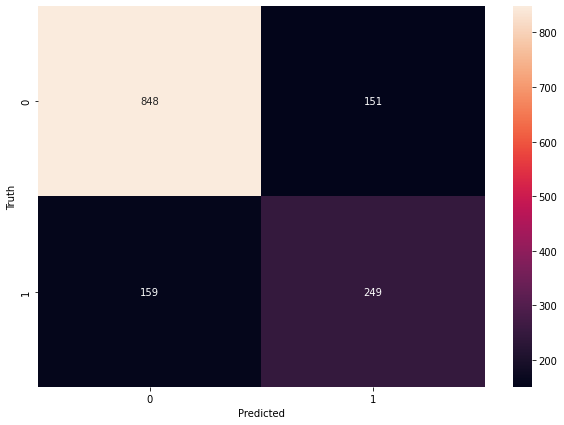

In [87]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [89]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7796730632551528

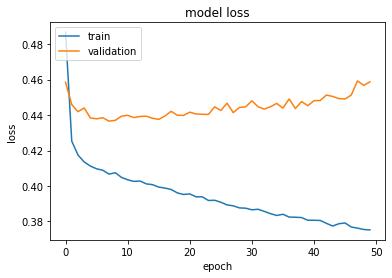

In [90]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

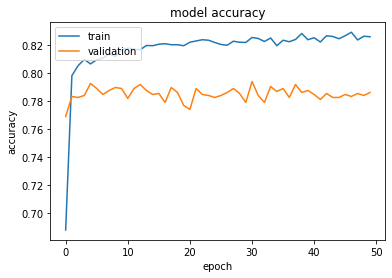

In [93]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()